<a href="https://colab.research.google.com/github/lovelyoyrmia/Foedtra/blob/main/Machine%20Learning/foedtra_preprocessing_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Download dataset from kaggle

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 69 bytes


In [ ]:
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes         36           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes        142           False  
store-sales-time-series-forecasting            2030-06-30 23:59:00  Getting Started  Knowledge        822           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        160           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       2006           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      13875           False  
house-pr

We are using [this dataset](https://kaggle.com/arizbw/traditional-food-knowledge-of-indonesia) for training the model

In [ ]:
!kaggle datasets download -d arizbw/traditional-food-knowledge-of-indonesia

100% 3.10G/3.10G [00:44<00:00, 97.8MB/s]
100% 3.10G/3.10G [00:44<00:00, 75.1MB/s]


Move Dataset to Drive

In [ ]:
!mv '/content/traditional-food-knowledge-of-indonesia.zip' '/content/drive/MyDrive/Capstone Project - Foedtra/'

In [ ]:
!unzip '/content/drive/MyDrive/Capstone Project - Foedtra/traditional-food-knowledge-of-indonesia.zip' -d '/content/'

### Create new dataframe

In [ ]:
import pandas as pd

def read_dataset(filepath):
  df = pd.read_csv(filepath)
  return df

In [ ]:
import pandas as pd
import os

In [ ]:
def create_new_dataset(df):
  labels = list(df['Finding Labels'].values)
  image_path = []

  for i in list(df['Image Index'].values):
    image_path.append(i)

  file_paths = pd.Series(image_path, name='Filepath').astype(str)
  labels = pd.Series(labels, name='Label')

  new_df = pd.concat([file_paths, labels], axis=1)

  return new_df

In [ ]:
def export_dataset(filepath, export_excel):
  df = read_dataset(filepath)
  export = create_new_dataset(df)
  export.to_excel(export_excel, index=None, header=True)

Before we move on, don't forget to create new directory called 'new_df'

In [ ]:
export_dataset('dev.csv', 'new_df/dev_images.xlsx')

### Processing dataset

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import pandas as pd
import numpy as np
import random
import os
import vaex

Load dataframes

In [ ]:
base_path = '/content/new_df'

train_df = pd.read_excel(os.path.join(base_path, 'train_images.xlsx'), nrows=100000)
test_df = pd.read_excel(os.path.join(base_path, 'test_images.xlsx'), nrows=100000)
dev_df = pd.read_excel(os.path.join(base_path, 'dev_images.xlsx'), nrows=100000)

Sort dataframes by Label

In [ ]:
train_df = train_df.sort_values(by='Label')
test_df = test_df.sort_values(by='Label')
dev_df = dev_df.sort_values(by='Label')

Show Random Images

In [ ]:
def rename_path_images(name, labels, dirs):
  return os.path.join(os.path.join('/content/drive/MyDrive/Capstone Project - Foedtra/dataset', dirs, labels), name)

In [ ]:
train_df['Filepath'] = train_df.apply(lambda x: rename_path_images(x['Filepath'], x['Label'], 'train'), axis=1)

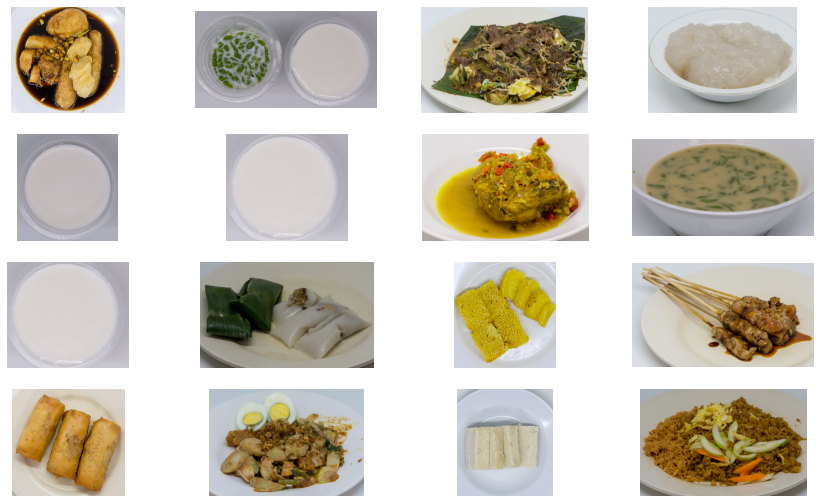

In [ ]:
images = list(train_df['Filepath'].values)

plt.figure(1, figsize=(15, 9))
plt.axis('off')
n = 0
for i in range(16):
  n += 1
  random_img = random.choice(images)
  imgs = plt.imread(random_img)
  plt.subplot(4, 4, n)
  plt.axis('off')
  plt.imshow(imgs)
  # print(random_img)

plt.show()

#### Move images from food-tfk-images to train dataset

In [ ]:
def move_images(df, folder):
  # Create new directory for labels of food
  for i in list(df['Label'].unique()):
    os.makedirs(os.path.join('dataset/' + folder, i))
  # Move Images
  for i in sorted(os.listdir('dataset/' + folder)):
    for j in df.index:
      if i == df['Label'][j]:
        file_path_image = os.path.split(df['Filepath'][j])[1]
        src = df['Filepath'][j]
        dst = os.path.join('/content/dataset/' + folder, i, file_path_image)
        os.rename(src, dst)

In [ ]:
move_images(dev_df, 'dev')

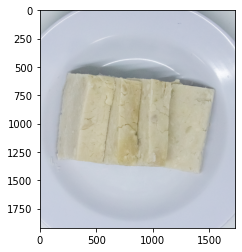

In [ ]:
imgs = plt.imread('/content/dataset/train/keladi/IMG_8738.jpg')
plt.imshow(imgs)
plt.show()

#### Show how much images are in dataset folder

In [ ]:
import glob as gb
def img_count_in_folder(FOLDER_PATH):  
  count_img = []
  for folder in sorted(os.listdir(FOLDER_PATH)):
    files=gb.glob(pathname=str(FOLDER_PATH + '/' + folder + '/*.jpg'))
    count_img.append([len(files), folder])
  return count_img

In [ ]:
import os

root_path = '/content/drive/MyDrive/Capstone Project - Foedtra/dataset'

train_path = os.path.join(root_path, 'train')
test_path = os.path.join(root_path, 'test')
dev_path = os.path.join(root_path, 'dev')

In [ ]:
print('Train Dir')
len(img_count_in_folder(train_path))

Train Dir


34

In [ ]:
print('Test Dir')
len(img_count_in_folder(test_path))

Test Dir


33

In [ ]:
print('Dev Dir')
len(img_count_in_folder(dev_path))

Dev Dir


32

In [ ]:
df = pd.read_csv('dev.csv')
# print([x for x in df['Finding Labels'].unique() if x == 'asinan-jakarta'])

# NASI GORENG KAMPUNG (TRAIN DATASET)

# KUNYIT ASAM and NASI GORENG KAMPUNG (TEST DATASET)
df.columns

Index(['Image Index', 'Patient ID', 'Finding Labels', 'asinan-jakarta',
       'ayam-betutu', 'ayam-bumbu-rujak', 'ayam-goreng-lengkuas', 'bika-ambon',
       'bir-pletok', 'bubur-manado', 'cendol', 'es-dawet', 'gado-gado',
       'gudeg', 'gulai-ikan-mas', 'keladi', 'kerak-telor', 'klappertart',
       'kolak', 'kue-lumpur', 'kunyit-asam', 'laksa-bogor', 'lumpia-semarang',
       'mie-aceh', 'nagasari', 'nasi-goreng-kampung', 'papeda',
       'pempek-palembang', 'rawon-surabaya', 'rendang', 'rujak-cingur',
       'sate-ayam-madura', 'sate-lilit', 'sate-maranggi', 'soerabi',
       'soto-ayam-lamongan', 'soto-banjar', 'tahu-telur'],
      dtype='object')